# Chelsea Jaculina 011274913
# DATA 266 HW2 Q2

Step 1: Install Required Libraries

In [3]:
!pip install sentence-transformers datasets matplotlib scikit-learn --quiet

Step 2: Load the 20 Newsgroups Dataset

In [2]:
from sklearn.datasets import fetch_20newsgroups

# Load dataset
newsgroups_data = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
docs = newsgroups_data.data
print(f"Loaded {len(docs)} documents.")

Loaded 11314 documents.


In [ ]:
!pip install numpy==1.26.4 --quiet
import os
os.kill(os.getpid(), 9)  # Restart runtime to apply fix

In [ ]:
!pip install bertopic sentence-transformers umap-learn scikit-learn --quiet

Step 3a: Simulated Doc2Vec (TF-IDF + SVD Embeddings)

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from bertopic import BERTopic

# TF-IDF + SVD
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(docs)

# Dimensionality reduction
svd_model = TruncatedSVD(n_components=300, random_state=42)
svd_embeddings = svd_model.fit_transform(tfidf_matrix)

# Topic Modeling
topic_model_tfidf_svd = BERTopic()
topics_tfidf_svd, _ = topic_model_tfidf_svd.fit_transform(docs, svd_embeddings)

 Step 3b: MPNet Embeddings

In [4]:
from sentence_transformers import SentenceTransformer

# Load MPNet model
mpnet_model = SentenceTransformer("all-mpnet-base-v2")
mpnet_embeddings = mpnet_model.encode(docs, show_progress_bar=True)

# Topic Modeling
topic_model_mpnet = BERTopic()
topics_mpnet, _ = topic_model_mpnet.fit_transform(docs, mpnet_embeddings)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/354 [00:00<?, ?it/s]

Step 3c: Advanced SBERT (e.g., all-roberta-large-v1)

In [5]:
# Load advanced SBERT model
sbert_model = SentenceTransformer("all-roberta-large-v1")  # You can switch to "Instructor-XL"
sbert_embeddings = sbert_model.encode(docs, show_progress_bar=True)

# Topic Modeling
topic_model_sbert = BERTopic()
topics_sbert, _ = topic_model_sbert.fit_transform(docs, sbert_embeddings)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/9.68k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/650 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

Batches:   0%|          | 0/354 [00:00<?, ?it/s]

In [8]:
!pip install gensim --quiet

Step 4: Compute Coherence Score

In [23]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

def compute_coherence_score(docs, topic_model, top_n_words=10):
    # Only keep topic IDs with top words
    topic_words = topic_model.get_topics()

    # Safely collect top-n words from valid topic IDs
    topic_tokens = []
    for topic_id in topic_words:
        words_scores = topic_words[topic_id][:top_n_words]
        words_only = [word for word, _ in words_scores]
        topic_tokens.append(words_only)

    # Tokenize and clean documents
    tokenized_docs = [doc.lower().split() for doc in docs]

    # Build dictionary and corpus
    dictionary = Dictionary(tokenized_docs)
    corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

    # Coherence Model
    coherence_model = CoherenceModel(
        topics=topic_tokens,
        texts=tokenized_docs,
        corpus=corpus,
        dictionary=dictionary,
        coherence='c_v'
    )

    return coherence_model.get_coherence()

Step 5: Calculate Scores

In [15]:
coh_tfidf_svd = compute_coherence_score(docs, topic_model_tfidf_svd)
coh_mpnet = compute_coherence_score(docs, topic_model_mpnet)
coh_sbert = compute_coherence_score(docs, topic_model_sbert)

print("Coherence Score (Simulated Doc2Vec - TFIDF+SVD):", coh_tfidf_svd)
print("Coherence Score (MPNet):", coh_mpnet)
print("Coherence Score (SBERT):", coh_sbert)

Coherence Score (Simulated Doc2Vec - TFIDF+SVD): 0.4592524569750951
Coherence Score (MPNet): 0.5256770706526888
Coherence Score (SBERT): 0.5256778581995608


In [25]:

import pandas as pd

coherence_scores = {
    'TF-IDF + SVD': coh_tfidf_svd,
    'MPNet': coh_mpnet,
    'SBERT': coh_sbert
}

df = pd.DataFrame(list(coherence_scores.items()), columns=['Model Name', 'Coherence Score'])

print(df)


     Model Name  Coherence Score
0  TF-IDF + SVD         0.459252
1         MPNet         0.525677
2         SBERT         0.525678


Visualize the Comparisons

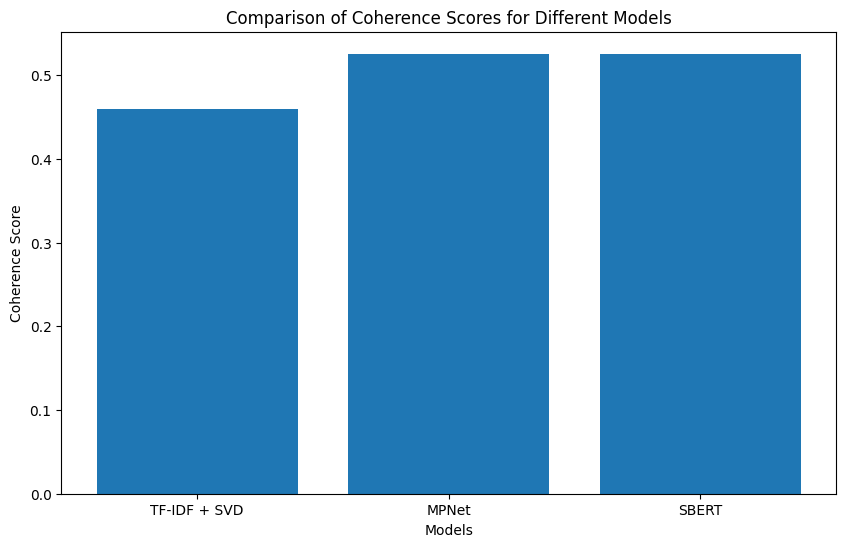

In [26]:
import matplotlib.pyplot as plt

coherence_scores = {
    'TF-IDF + SVD': coh_tfidf_svd,
    'MPNet': coh_mpnet,
    'SBERT': coh_sbert
}

plt.figure(figsize=(10, 6))
plt.bar(coherence_scores.keys(), coherence_scores.values())
plt.xlabel('Models')
plt.ylabel('Coherence Score')
plt.title('Comparison of Coherence Scores for Different Models')
plt.show()
